In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Load data
df = pd.read_csv("reportsent.csv", encoding = 'latin')

In [8]:
df.head(2)

Date   TIME                                             From  \
0  01-11-2025 20:52  20:52  Kenvue Reports <reports.kenvue@loveinstore.com>   
1  01-11-2025 19:12  19:12  Kenvue Reports <reports.kenvue@loveinstore.com>   

                                                  To  \
0  JSingh09@kenvue.com, "Purohit, Ankit" <apuroh1...   
1  uttam kumar pati <uttamkanika@gmail.com>, Kish...   

                                        Subject  \
0  2801_Kenvue_ Dashboard till 31st Oct '25-KAM   
1  2803_Kenvue_Supervisor Tracker_31th Oct-2025   

                                             Snippet  ClientCode ClientName  \
0  Hi All, PFA the final dashboard till 31st Oct'...          28     Kenvue   
1  Hi All , PFA The Kenvue Supervisor Tracker_31t...          28     Kenvue   

  ReportCode   SentDate  ReportSent  
0       2801 2025-11-01           1  
1       2803 2025-11-01           1

In [6]:

# Convert to datetime
df['SentDate'] = pd.to_datetime(df['SentDate'], dayfirst=True)

# Count reports per date
daily_counts = df.groupby('SentDate')['ReportSent'].sum()




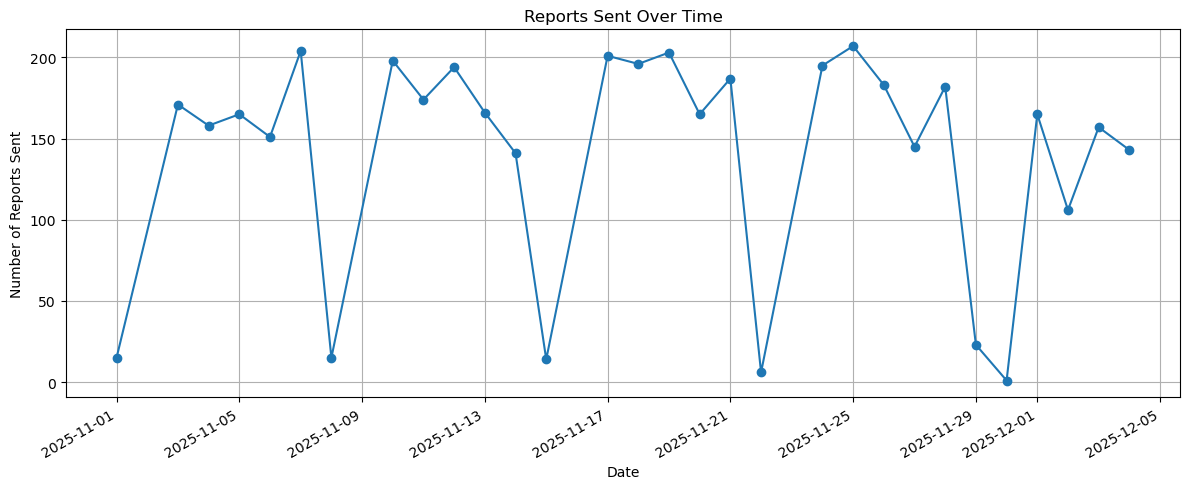

In [7]:
# Plot
plt.figure(figsize=(12,5))
daily_counts.plot(kind='line', marker='o')
plt.title("Reports Sent Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Reports Sent")
plt.grid(True)
plt.tight_layout()
plt.show()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        4231 non-null   object        
 1   TIME        4231 non-null   object        
 2   From        4231 non-null   object        
 3   To          4231 non-null   object        
 4   Subject     4231 non-null   object        
 5   Snippet     4230 non-null   object        
 6   ClientCode  4231 non-null   int64         
 7   ClientName  4231 non-null   object        
 8   ReportCode  4231 non-null   object        
 9   SentDate    4231 non-null   datetime64[ns]
 10  ReportSent  4231 non-null   int64         
 11  Hour        4231 non-null   int32         
dtypes: datetime64[ns](1), int32(1), int64(2), object(8)
memory usage: 380.3+ KB


In [13]:
# Convert to datetime (dd-mm-yyyy HH:MM:SS format)
# df['SentDate'] = pd.to_datetime(df['SentDate'], dayfirst=True)

# Convert the text column to datetime first
df['SentDate'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)


# Extract hour from timestamp
df['Hour'] = df['SentDate'].dt.hour

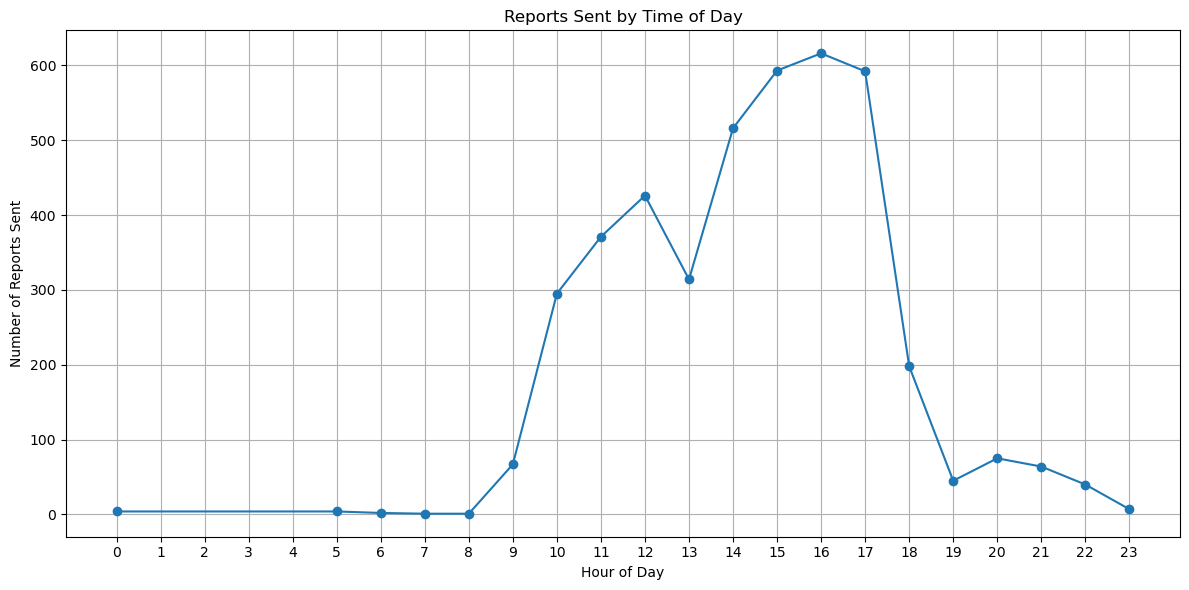

In [14]:
# Count reports sent per hour
hourly_count = df.groupby('Hour')['ReportSent'].sum().reset_index()

# Plot
plt.figure(figsize=(12,6))
plt.plot(hourly_count['Hour'], hourly_count['ReportSent'], marker='o')
plt.title('Reports Sent by Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Reports Sent')
plt.grid(True)
plt.xticks(range(0, 24))  # 0–23 hour range
plt.tight_layout()
plt.show()

In [30]:
import pandas as pd

# Load data
# df = pd.read_excel("ReportData.xlsx")

# Convert datetime column properly
df['SentDate'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)

# Extract only date (remove time portion)
df['SentDay'] = df['SentDate'].dt.date

# Create pivot table : Client vs Day
pivot_client_day = pd.pivot_table(
    df,
    values='ReportSent',
    index='ClientName',       # rows
    columns='SentDay',    # columns (dates)
    aggfunc='sum',
    fill_value=0          # replace NaN with 0
)

# print(pivot_client_day)

In [31]:
pivot_client_day.head()

SentDay          2025-11-01  2025-11-03  2025-11-04  2025-11-05  2025-11-06  \
ClientName                                                                    
AWL Agri                  0           5           6           7           6   
Amul GT & MT              0           2           2           2           2   
Bacardi Premium           0           3           1           0           0   
Bacardi legacy            2          11           8           8           8   
BajajConsumer             0           4           6           8           8   

SentDay          2025-11-07  2025-11-08  2025-11-10  2025-11-11  2025-11-12  \
ClientName                                                                    
AWL Agri                  7           0           5           0           7   
Amul GT & MT              2           0           2           0           2   
Bacardi Premium           5           0           7           5           1   
Bacardi legacy            7           1          10           7           9   
BajajConsumer             9           0           9           8           8   

SentDay          ...  2025-11-25  2025-11-26  2025-11-27  2025-11-28  \
ClientName       ...                                                   
AWL Agri         ...           7           7           7           7   
Amul GT & MT     ...           2           2           2           2   
Bacardi Premium  ...           3           1           3           0   
Bacardi legacy   ...           5           6           6           6   
BajajConsumer    ...          10           6           0           1   

SentDay          2025-11-29  2025-11-30  2025-12-01  2025-12-02  2025-12-03  \
ClientName                                                                    
AWL Agri                  0           0           7           5           5   
Amul GT & MT              0           0           2           2           2   
Bacardi Premium           0           0           5           0           4   
Bacardi legacy            1           0           6           7           9   
BajajConsumer             0           0           0           0           0   

SentDay          2025-12-04  
ClientName                   
AWL Agri                  0  
Amul GT & MT              0  
Bacardi Premium           3  
Bacardi legacy            4  
BajajConsumer             2  

[5 rows x 30 columns]

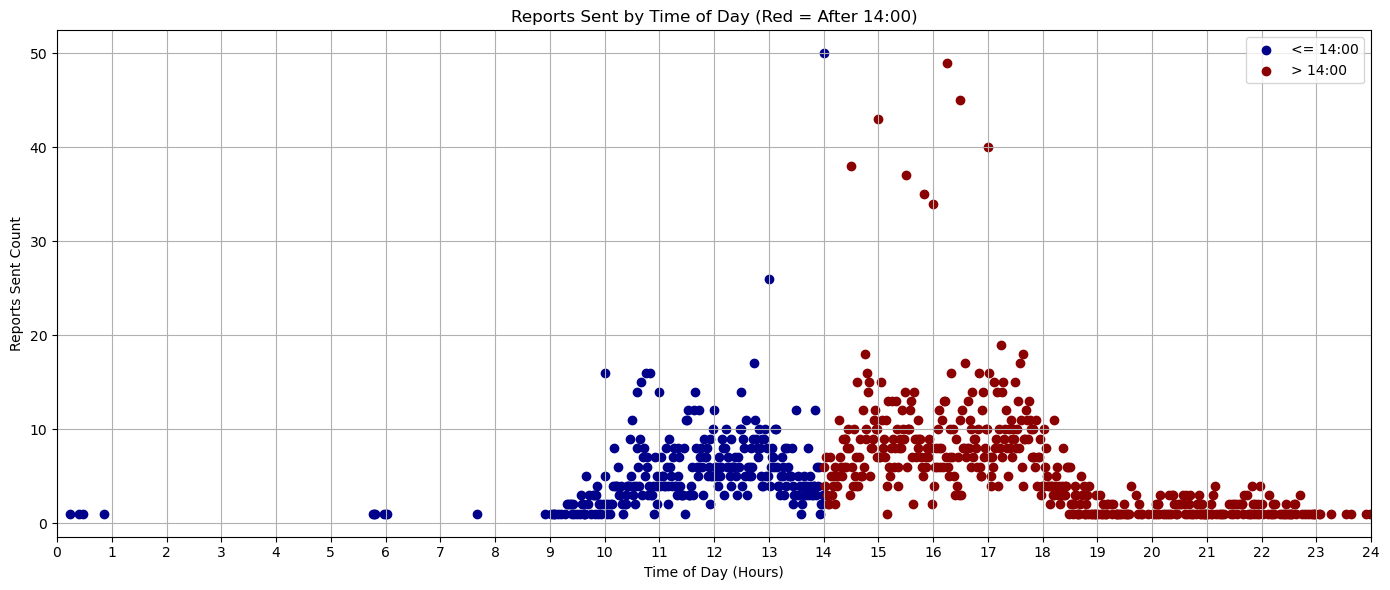

In [29]:

# Convert text column to datetime
df['SentDate'] = pd.to_datetime(df['SentDate'], errors='coerce', dayfirst=True)

# Extract time of day as continuous fractional hour
df['TimeOfDay'] = df['SentDate'].dt.hour + df['SentDate'].dt.minute/60

# Group by continuous time
time_counts = df.groupby('TimeOfDay')['ReportSent'].sum().reset_index()

# Split into before & after 14 hours
before_14 = time_counts[time_counts['TimeOfDay'] <= 14]
after_14 = time_counts[time_counts['TimeOfDay'] > 14]

plt.figure(figsize=(14,6))

# Plot dots before or at 14 hrs → Blue
plt.scatter(before_14['TimeOfDay'], before_14['ReportSent'], color='darkblue', label='<= 14:00')

# Plot dots after 14 hrs → Red
plt.scatter(after_14['TimeOfDay'], after_14['ReportSent'], color='darkred', label='> 14:00')

plt.title('Reports Sent by Time of Day (Red = After 14:00)')
plt.xlabel('Time of Day (Hours)')
plt.ylabel('Reports Sent Count')
plt.xlim(0, 24)
plt.xticks(range(0, 25, 1))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [34]:
import pandas as pd

# Convert datetime column properly
df['SentDate'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)

# Extract date and time separately
df['SentDay'] = df['SentDate'].dt.date
df['SentTime'] = df['SentDate'].dt.time  # <-- only time portion

# Create a pivot with Client + Report ID combined as rows
df['Client_Report'] = df['ClientName'] + " | " + df['ReportCode'].astype(str)

pivot_client_report_day = pd.pivot_table(
    df,
    values='SentTime',
    index='Client_Report',  # rows: client + report id
    columns='SentDay',      # columns: date
    aggfunc=lambda x: ', '.join(x.astype(str)),  # if multiple times per day, join values
    fill_value=''
)

# print(pivot_client_report_day)


In [35]:
pivot_client_report_day.head()

SentDay         2025-11-01 2025-11-03 2025-11-04 2025-11-05 2025-11-06  \
Client_Report                                                            
AWL Agri | 1101              09:55:00   14:32:00   13:20:00   12:56:00   
AWL Agri | 1102              09:52:00   17:40:00   13:20:00   12:52:00   
AWL Agri | 1103              14:45:00   17:07:00   16:05:00   15:16:00   
AWL Agri | 1104              15:48:00   17:22:00   16:49:00   17:55:00   
AWL Agri | 1107                         12:17:00                         

SentDay         2025-11-07 2025-11-08 2025-11-10 2025-11-11 2025-11-12  ...  \
Client_Report                                                           ...   
AWL Agri | 1101   14:39:00              15:40:00              11:20:00  ...   
AWL Agri | 1102   14:32:00              10:32:00              11:21:00  ...   
AWL Agri | 1103   15:12:00              15:43:00              11:52:00  ...   
AWL Agri | 1104   17:01:00                                    17:10:00  ...   
AWL Agri | 1107                                                         ...   

SentDay         2025-11-25 2025-11-26 2025-11-27 2025-11-28 2025-11-29  \
Client_Report                                                            
AWL Agri | 1101   13:04:00   11:06:00   11:53:00   12:20:00              
AWL Agri | 1102   13:39:00   11:27:00   12:20:00   12:16:00              
AWL Agri | 1103   15:06:00   11:58:00   15:13:00   14:54:00              
AWL Agri | 1104   16:23:00   17:09:00   16:18:00   15:15:00              
AWL Agri | 1107                                                          

SentDay         2025-11-30 2025-12-01 2025-12-02 2025-12-03 2025-12-04  
Client_Report                                                           
AWL Agri | 1101              12:45:00   15:05:00   13:06:00             
AWL Agri | 1102              19:27:00   16:45:00   13:20:00             
AWL Agri | 1103              14:57:00   15:17:00   14:37:00             
AWL Agri | 1104              17:50:00   15:27:00   15:04:00             
AWL Agri | 1107                                                         

[5 rows x 30 columns]

In [38]:
import pandas as pd

# Convert datetime column properly
df['SentDate'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)

# Extract day and time (HH:MM)
df['SentDay'] = df['SentDate'].dt.date
df['SentTime'] = df['SentDate'].dt.strftime('%H:%M')  # <-- HH:MM format

# Create unique row label with Client + Report ID
df['Client_Report'] = df['ClientName'] + " | " + df['ReportCode'].astype(str)

# Pivot table
pivot_client_report_day = pd.pivot_table(
    df,
    values='SentTime',
    index='Client_Report',
    columns='SentDay',
    aggfunc=lambda x: ', '.join(x),  # join multiple times if exists
    fill_value=''
)


In [39]:
pivot_client_report_day.head()

SentDay         2025-11-01 2025-11-03 2025-11-04 2025-11-05 2025-11-06  \
Client_Report                                                            
AWL Agri | 1101                 09:55      14:32      13:20      12:56   
AWL Agri | 1102                 09:52      17:40      13:20      12:52   
AWL Agri | 1103                 14:45      17:07      16:05      15:16   
AWL Agri | 1104                 15:48      17:22      16:49      17:55   
AWL Agri | 1107                            12:17                         

SentDay         2025-11-07 2025-11-08 2025-11-10 2025-11-11 2025-11-12  ...  \
Client_Report                                                           ...   
AWL Agri | 1101      14:39                 15:40                 11:20  ...   
AWL Agri | 1102      14:32                 10:32                 11:21  ...   
AWL Agri | 1103      15:12                 15:43                 11:52  ...   
AWL Agri | 1104      17:01                                       17:10  ...   
AWL Agri | 1107                                                         ...   

SentDay         2025-11-25 2025-11-26 2025-11-27 2025-11-28 2025-11-29  \
Client_Report                                                            
AWL Agri | 1101      13:04      11:06      11:53      12:20              
AWL Agri | 1102      13:39      11:27      12:20      12:16              
AWL Agri | 1103      15:06      11:58      15:13      14:54              
AWL Agri | 1104      16:23      17:09      16:18      15:15              
AWL Agri | 1107                                                          

SentDay         2025-11-30 2025-12-01 2025-12-02 2025-12-03 2025-12-04  
Client_Report                                                           
AWL Agri | 1101                 12:45      15:05      13:06             
AWL Agri | 1102                 19:27      16:45      13:20             
AWL Agri | 1103                 14:57      15:17      14:37             
AWL Agri | 1104                 17:50      15:27      15:04             
AWL Agri | 1107                                                         

[5 rows x 30 columns]

In [40]:
pivot_client_report_day.to_csv('pivot_client_report_day.csv')